## Problem Sheet #6


## <a href="https://en.wikipedia.org/wiki/Shooting_method">Shooting method</a>

<br>
### Linear shooting method

<br>
<b>Problem 1.</b> Let us consider the following two point BVP

\begin{cases}
y''(x)=\frac{2x}{x^2+1}y'(x)-\frac{2}{x^2+1}y(x)+x^2+1,\quad x\in(0,1)\\
y(0)=2\\
y(1)=5/3
\end{cases}
<br>

Solve the above problem with the linear shooting method where we have solved the corresponding IVP with the built-in MATLAB solver ODE45. Make a plot about the numerical and analytical solution.

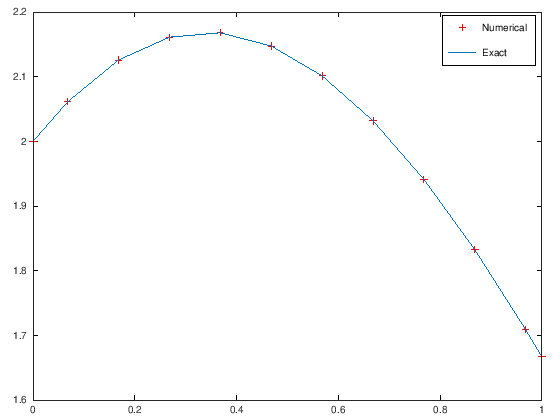

In [2]:
a=0; b=1; alpha=2; beta=5/3;
% MATLAB ODE45 solver for the IVP
[x z]=ode45('f_6_1',[a b], [alpha 0 0 1]);
[n m]=size(z);
% Linear Shooting Method
y(1:n,1)=z(1:n,1)+(beta-z(n,1))*z(1:n,3)./z(n,3);
exact=x.^4/6-3*x.^2/2+x+2;
% Plot
plot(x,y,'r+',x,exact)
legend('Numerical','Exact')

<br>
### Nonlinear shooting method
<br>
#### Newton's method
<br>
<b>Problem 2.</b> Let us consider the following two point BVP

\begin{cases}
y''(x)=-\frac{(y'(x))^2}{y(x)},\quad x\in(0,1)\\
y(0)=1\\
y(1)=2
\end{cases}

Solve the above problem with the Newton's method type nonlinear shooting method where we have solved the corresponding IVP with the built-in MATLAB solver ODE45. Make a plot about the numerical and analytical solution.

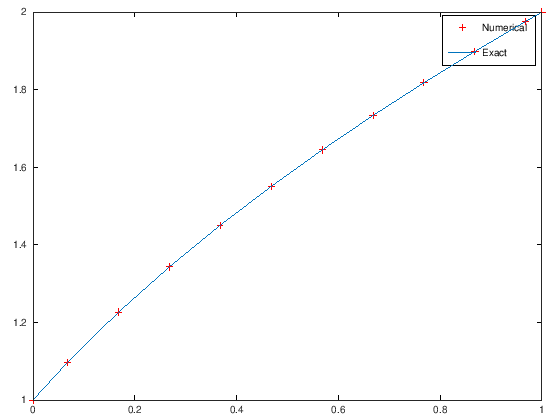

In [3]:
a=0; b=1; alpha=1; beta=2;
% Stopping criteria parameters for Newton's method
max_it=5; tol=1e-5;
% Nonlinear Shooting Method (Newton's method + MATLAB ODE45 solver for the IVP)
Newton(1)=0; test=1; it=1;
while (test>tol)&&(it<=max_it)
    z0=[alpha Newton(it) 0 1];
    [x , z]=ode45('f_6_2',[a b],z0);
    [n m]=size(z);
    nonlin(it)=z(n,1)-beta;
    test=abs(nonlin(it));
    Newton(it+1)=Newton(it)-nonlin(it)/z(n,3);
    it=it+1;
end
exact=sqrt(3*x+1);
plot(x,z(:,1),'r+',x,exact)
legend('Numerical','Exact')


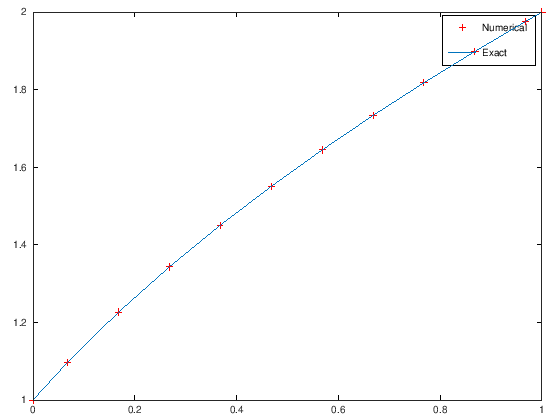

In [4]:
% Compact code
% Test #1: Problem 2.
problem=@(x,y)[y(2)
    -(y(2)^2)/y(1)
    y(4)
    y(3)*(y(2)/y(1))^2-2*y(4)*y(2)/y(1)];
[x,y]=shootingmethod(0,1,1,2,5,1e-5,problem);

exact=sqrt(3*x+1);
plot(x,y(:,1),'r+',x,exact)
legend('Numerical','Exact')

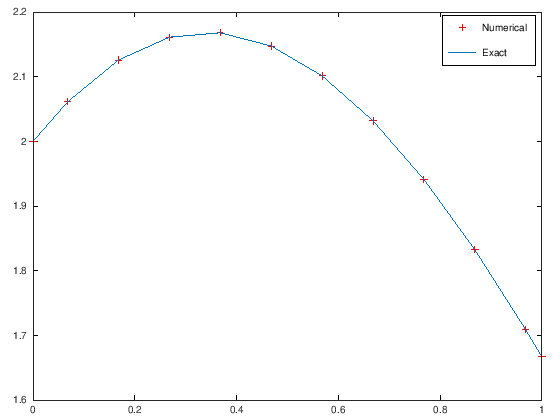

In [5]:
% Compact code
% Test #2: Problem 1.
problem=@(x,y)[y(2)
    y(2)*2*x./(x.^2+1)-y(1)*2/(x.^2+1)+x.^2+1
    y(4)
    y(4)*2*x./(x.^2+1)-y(3)*2/(x.^2+1)];
[x,y]=shootingmethod(0,1,2,5/3,5,1e-5,problem);
exact=x.^4/6-3*x.^2/2+x+2;
plot(x,y(:,1),'r+',x,exact)
legend('Numerical','Exact')

<br>
#### <a href="https://en.wikipedia.org/wiki/Secant_method">Secant method</a> and  <a href="https://en.wikipedia.org/wiki/Robin_boundary_condition">mixed (Robin) BC</a>
<br>
<b>Problem 3.</b> Let us consider the following two point BVP

\begin{cases}
y''(x)=-2y(x)y'(x),\quad x\in(0,1)\\
y(0)=1\\
y(1)+y'(1)-0.25=0
\end{cases}

Solve the above problem with the secant method type nonlinear shooting method where we have solved the corresponding IVP with the built-in MATLAB solver ODE45. Make a plot about the numerical and analytical solution.

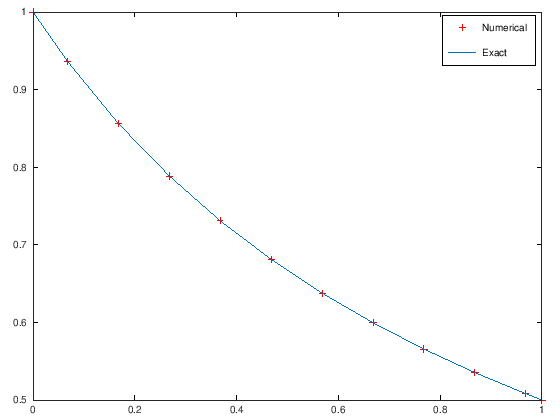

In [6]:
a=0; b=1; alpha=1;
% Secant method
max_it=10; tol=1e-5;
f=inline('[z(2); -2*z(1).*z(2)]','x','z');
g='z1+z2-0.25';
t(1)=0; t(2)=1; test=1; it=1;
while (test>tol)&&(it<=max_it)
    if it>2
        t(it)=t(it-1)-(t(it-1)-t(it-2))*m(it-1)/(m(it-1)-m(it-2));
    end
    % MATLAB ODE45 solver for the IVP
    z0=[alpha t(it)];
    [x,z]=ode45(f,[a b], z0);
    [n nn]=size(z);
    z1=z(n,1);
    z2=z(n,2);
    m(it)=eval(g);
    test=abs(m(it));
    it=it+1;
end
exact=1./(x+1);
plot(x,z(:,1),'r+',x,exact)
legend('Numerical','Exact')